# Problem 2

Everything is same as Problem 1, except we use SVM instead of logistic regression. So I omit explanation unless new method is used

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Unlike logistic regerssion, we append weight-penalty term. This is because SVM cannot discriminate when max() term is zero. If we do not append weight penalty term, this may cause overfitting.

In [3]:
N, p  = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)    # (N,p)
Y = 2*np.random.randint(2,size=N) - 1    # (1,N)
weight_penatly = 0.1

In [4]:
def f(theta : np.ndarray, i : int) -> np.float64:
    return max(0, 1-Y[i]*(X[i]@theta)) + weight_penatly*(theta@theta)

def F(theta : np.ndarray) -> np.float64:
    return sum(f(theta,i) for i in range(N))/N

def grad_f(theta : np.ndarray, i : int) -> np.ndarray:
    if Y[i]*(X[i]@theta)>1: return 2*weight_penatly*theta
    return -Y[i]*X[i] + 2*weight_penatly*theta

In [5]:
alpha = 0.005
theta = np.random.randn(p)
thetas = []
values = []

iteration_num = 10000
for _ in range(iteration_num):
    i = np.random.randint(p)
    theta -= alpha*grad_f(theta, i)
    thetas.append(theta.copy())
    values.append(F(theta))

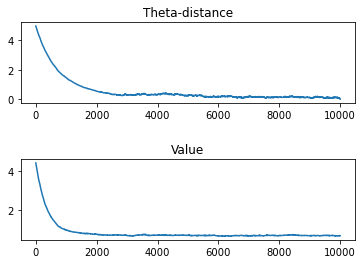

In [6]:
x = np.arange(iteration_num)
y_distance = np.apply_along_axis(np.linalg.norm, axis=1, arr=np.array(thetas)-thetas[-1])
y_val = np.array(values)

plt.subplot(2,1,1)
plt.plot(x, y_distance)
plt.title("Theta-distance")

plt.subplot(2,1,2)
plt.plot(x, y_val)
plt.title("Value")

plt.subplots_adjust(hspace=0.7)
plt.show()